# Libraries

In [1]:
import matplotlib.pyplot as plt
# Do you want plot with latex font format? Use the cell bellow:
import matplotlib as mpl
mpl.rcParams.update({
                        'font.family': 'serif',
                        'mathtext.fontset': 'cm',
                        'axes.unicode_minus': False
                    })
import numpy as np
import pandas as pd
import seaborn as sns


# Dataset upload or create

For simplicity we use a random variable concept to create a dataset.

In [2]:
x = np.random.normal(5, 2, 10000)
y = np.random.gumbel(5, 2, 10000)
data = {
            'x': x,
            'y': y
        }
data = pd.DataFrame(data)


### Data using CDF

In [3]:
def obtain_cdf(x: list) -> tuple[list, list]:
    """
    Obtain the cumulative distribution function (CDF) of a list of values.

    :param x: values
    :return: [0] = sorted values, [1] = CDF of the input values
    """
    
    x_sorted = np.sort(x)
    x_cdf = np.arange(1, len(x_sorted) + 1) / len(x_sorted)

    return list(x_sorted), list(x_cdf)

data_for_CDF = data['x'].tolist()
x_cdf, y_cdf = obtain_cdf(data_for_CDF)


# Chart

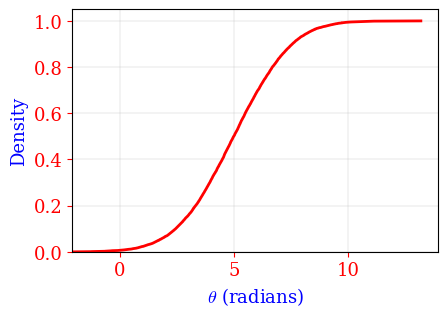

In [4]:
### Figure name and DPI
dpi = 600               # Change as you wish
name = 'cdf_chart' # Change as you wish

### Chart dimensions (in centimeters)
b_cm = 12                                                   # Change as you wish
h_cm = 8                                                    # Change as you wish
inches_to_cm = 1 / 2.54
b_input = b_cm * inches_to_cm
h_input = h_cm * inches_to_cm

label_y = 'Density'
label_x = '$\\theta$ (radians)' # Change as you wish
size_label = 13                 # Change as you wish
color_label = 'blue'            # or hexadecimal. Change as you wish
size_axis = 13                  # Change as you wish
color_axis = 'red'              # or hexadecimal. Change as you wish
line_width = 2

### Color
color = ['red', 'black', 'blue']                 # Change as you wish
labels_legend = ['Normal', 'Gumbel']    # Change as you wish
size_legend = 11                        # Change as you wish
location_legend = 'upper right'        # Change as you wish - 'best' look up by the best fit

### Marker
size_marker = 0                  # Change as you wish
marker_style = 'o'               # Change as you wish

### figure
fig, ax = plt.subplots(figsize=(b_input, h_input))

### Title. Do you need a title? Use the cell bellow:
# ax.set_title('bar histogram', fontsize=16)

### Config axis
ax.tick_params(axis='both', which='major', labelsize=size_axis, colors=color_axis)
ax.set_xlabel(label_x, fontsize=size_label, color=color_label)
ax.set_ylabel(label_y, fontsize=size_label, color=color_label)

### Config grid
on_or_off = True
plt.grid(on_or_off, which='both', linestyle='-', linewidth=0.2)

### Plot data here:
plt.plot(x_cdf, y_cdf, color=color[0], linewidth = line_width, marker=marker_style, markersize=size_marker, markerfacecolor=color[1], markeredgecolor=color[2])

### graph limit
plt.ylim(0, 1.05)
plt.xlim(left=min(x_cdf))

### Save. Do you need save? Use the cell bellow:
fig.savefig('Traditional-cdf.png', dpi=dpi, bbox_inches='tight')
plt.show()

